<a href="https://colab.research.google.com/github/sourabhkulkarni-007/machine-learning-practicing-notebooks/blob/master/decision_tree_problem%20statement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

Saving Boston.csv to Boston.csv


{'Boston.csv': b'"","crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat","medv"\n"1",0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n"2",0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n"3",0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n"4",0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n"5",0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n"6",0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n"7",0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n"8",0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n"9",0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n"10",0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n"11",0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n"12",0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,3

In [0]:
#use ML to predict the selling price of houses based on some economic factors by using decision tree model
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#load the data set
boston = pd.read_csv("Boston.csv")

In [0]:
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Text(0, 0.5, 'meadian values of rooms')

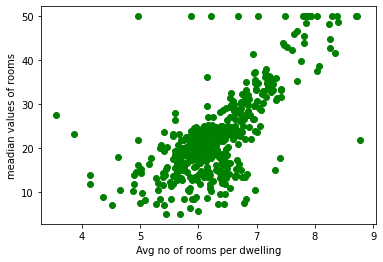

In [0]:
#visualize the dataset using the scatter plot
x = boston['rm']
y = boston['medv']
plt.scatter(x,y,color = 'green')
plt.xlabel('Avg no of rooms per dwelling')
plt.ylabel('meadian values of rooms')


In [0]:
#defining the targets and features of datasets
x = pd.DataFrame(boston['rm']) #features
y = pd.DataFrame(boston['medv']) #targets 

In [0]:
#split the datasets into train and test set
#80% train and 20% test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

In [0]:
#build model with decision tree regression method
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion = 'mse',random_state = 100,max_depth = 4,min_samples_leaf = 1)
regressor.fit(x_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

In [0]:
#visualize the  tree using graph viz
from sklearn.tree import export_graphviz
import pydotplus

export_graphviz(regressor,out_file = "regression_tree.dot")


In [0]:
from google.colab import files
files.download("regression_tree.dot")

In [0]:
#predict the values
y_pred = regressor.predict(x_test)

In [0]:
#print the values
print(y_pred[4:9])
print(y_test[4:9])

[20.91978022 15.01111111 17.79183673 15.01111111 19.12568807]
     medv
401   7.2
496  19.7
119  19.3
374  13.8
145  13.8


In [0]:
#lets find the rmse value
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred,y_test)
rmse = np.sqrt(mse)
rmse

6.405396648610143